In [1]:
import pandas as pd
import numpy as np
import pycmap
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px

## Finding PAR data from hyperpro profiles from 15m and above

In [2]:
df = pd.read_csv('Gradients 4 - TN397 - Hyperpro Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df['time'] = pd.DatetimeIndex(df.time.values)
df.dropna()
target_depth = df[df.depth < 15]
df1 = target_depth.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'par_z': 'mean'}).reset_index()
df1

,time,par_z
0,2021-11-24 21:00:00+00:00,602.774615
1,2021-11-24 22:00:00+00:00,NaN
2,2021-11-24 23:00:00+00:00,NaN
3,2021-11-25 00:00:00+00:00,NaN
4,2021-11-25 01:00:00+00:00,NaN
...,...,...
284,2021-12-06 17:00:00+00:00,NaN
285,2021-12-06 18:00:00+00:00,NaN
286,2021-12-06 19:00:00+00:00,NaN
287,2021-12-06 20:00:00+00:00,NaN


In [3]:
df2 = pd.read_csv('Gradients5_TN412_Hyperpro_Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df2['time'] = pd.DatetimeIndex(df2.time.values)
df2.dropna()
target_depth_2 = df2[df2.depth < 15]
df3 = target_depth_2.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'par_z': 'mean'}).reset_index()
df3

,time,par_z
0,2023-01-28 22:00:00+00:00,618.440000
1,2023-01-28 23:00:00+00:00,NaN
2,2023-01-29 00:00:00+00:00,NaN
3,2023-01-29 01:00:00+00:00,NaN
4,2023-01-29 02:00:00+00:00,NaN
...,...,...
283,2023-02-09 17:00:00+00:00,NaN
284,2023-02-09 18:00:00+00:00,NaN
285,2023-02-09 19:00:00+00:00,NaN
286,2023-02-09 20:00:00+00:00,NaN


## Calling in sat par to compare against hyperpro profiles

In [13]:
sat_par = pd.read_csv('/Users/ceg/Desktop/kristine/SACNAS-2023-project/sat_par.csv')
sat_par['Date'] = pd.DatetimeIndex(sat_par.Date.values)

## Plots pt 1

In [5]:
merged = pd.merge(df1, sat_par, left_on = 'time', right_on = 'Date', how = 'inner')
merged

,time,par_z,Unnamed: 0,Date,cruise,PAR,sat_par
0,2021-11-24 21:00:00+00:00,602.774615,123,2021-11-24 21:00:00+00:00,TN397_130,959.642028,959.642028
1,2021-11-24 22:00:00+00:00,NaN,124,2021-11-24 22:00:00+00:00,TN397_130,822.392073,822.392073
2,2021-11-24 23:00:00+00:00,NaN,125,2021-11-24 23:00:00+00:00,TN397_130,922.855468,922.855468
3,2021-11-25 00:00:00+00:00,NaN,126,2021-11-25 00:00:00+00:00,TN397_130,393.171918,393.171918
4,2021-11-25 01:00:00+00:00,NaN,127,2021-11-25 01:00:00+00:00,TN397_130,125.243908,125.243908
...,...,...,...,...,...,...,...
283,2021-12-06 17:00:00+00:00,NaN,406,2021-12-06 17:00:00+00:00,TN397_130,1249.362394,1249.362394
284,2021-12-06 18:00:00+00:00,NaN,407,2021-12-06 18:00:00+00:00,TN397_130,961.905059,961.905059
285,2021-12-06 19:00:00+00:00,NaN,408,2021-12-06 19:00:00+00:00,TN397_130,1399.462119,1399.462119
286,2021-12-06 20:00:00+00:00,NaN,409,2021-12-06 20:00:00+00:00,TN397_130,1354.217580,1354.217580


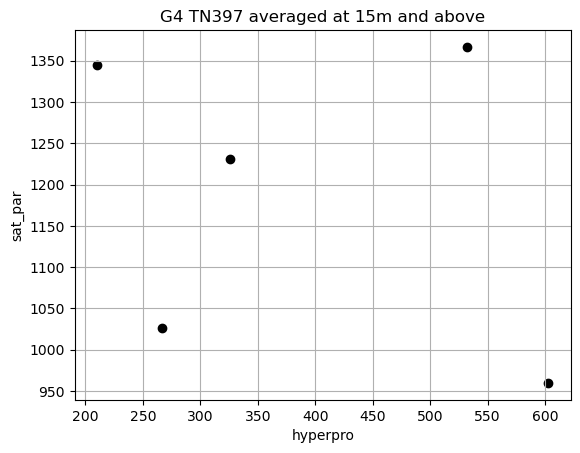

In [6]:
x = merged['par_z']
y = merged['sat_par']


plt.scatter(x, y, c = 'black')
#plt.scatter(x2, y2, c = 'red', label = 'sat PAR')


plt.xlabel("hyperpro")
plt.ylabel("sat_par")
plt.title("G4 TN397 averaged at 15m and above")
#plt.legend()
plt.grid()

## Plots pt 2

In [38]:
underway_hrly.drop(underway_hrly.loc[underway_hrly['surface_par'] > 5000].index, inplace=True)

## random values over 5000 PAR so i tried dropping them for now but funciton not working WAHHH

In [39]:
underway = pd.read_csv('Gradients 4 - TN397 - Underway Hyperpro - Surface PAR.csv')
underway['time'] = pd.DatetimeIndex(underway.time.values)
underway.dropna()
underway_hrly = underway.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'surface_par': 'mean'}).reset_index()
underway_hrly

,time,surface_par
0,2021-11-19 16:00:00+00:00,335.690638
1,2021-11-19 17:00:00+00:00,417.335653
2,2021-11-19 18:00:00+00:00,740.360083
3,2021-11-19 19:00:00+00:00,968.784938
4,2021-11-19 20:00:00+00:00,911.214295
...,...,...
577,2021-12-13 17:00:00+00:00,251.926089
578,2021-12-13 18:00:00+00:00,613.033112
579,2021-12-13 19:00:00+00:00,945.966395
580,2021-12-13 20:00:00+00:00,1124.255474


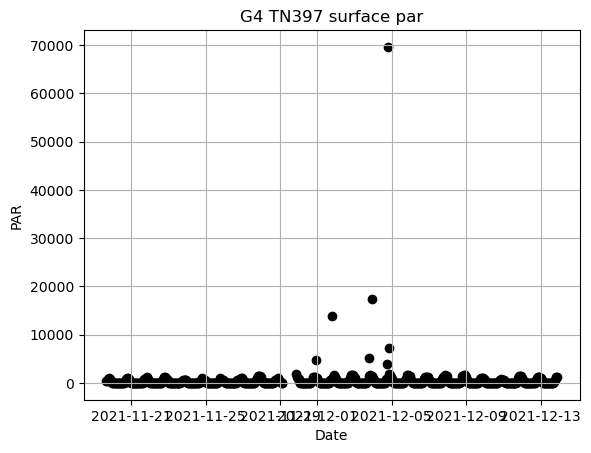

In [40]:
x = underway_hrly['time']
y = underway_hrly['surface_par']


plt.scatter(x, y, c = 'black')
#plt.scatter(x2, y2, c = 'red', label = 'sat PAR')


plt.xlabel("Date")
plt.ylabel("PAR")
plt.title('G4 TN397 surface par')
plt.grid()